<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Neural-Network-Model" data-toc-modified-id="Neural-Network-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Neural Network Model</a></span></li><li><span><a href="#Zero-Initialization" data-toc-modified-id="Zero-Initialization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Zero Initialization</a></span></li><li><span><a href="#Random-Initialization" data-toc-modified-id="Random-Initialization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random Initialization</a></span></li><li><span><a href="#Random-initialization-Small-Parameters" data-toc-modified-id="Random-initialization-Small-Parameters-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Random initialization Small Parameters</a></span></li><li><span><a href="#He-initialization" data-toc-modified-id="He-initialization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>He initialization</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Initialization in Deep Learning

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from deeplearning.course_two.initialization.dnn_utils import *
from sklearn.datasets import make_circles

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
def load_dataset():
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    return train_X, train_Y, test_X, test_Y

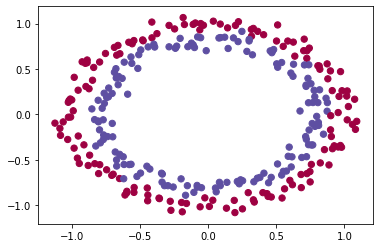

In [3]:
train_X, train_Y, test_X, test_Y = load_dataset()

## Neural Network Model

In [4]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, 
          print_cost = True, initialization = "he"):

    grads = {}
    costs = [] 
    m = X.shape[1] 
    layers_dims = [X.shape[0], 10, 5, 1]
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    for i in range(0, num_iterations):
        a3, cache = forward_propagation(X, parameters)
        cost = compute_loss(a3, Y)
        grads = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters

## Zero Initialization

In [5]:
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    L = len(layers_dims) 
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l],layers_dims[l-1] ))
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1 ))
    return parameters

In [6]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


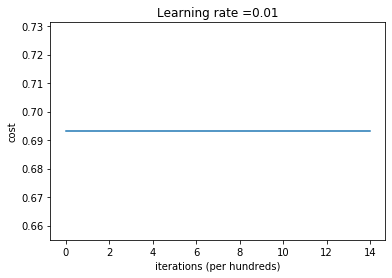

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [7]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

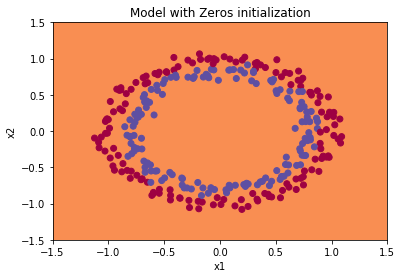

In [8]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing, and you might as well be training a neural network with $n^{[l]}=1$ for every layer, and the network is no more powerful than a linear classifier such as logistic regression. 

## Random Initialization

In [9]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [10]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


C:\Users\pakon\MyPythonModules\deeplearning\course_two\initialization\dnn_utils.py:71: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\pakon\MyPythonModules\deeplearning\course_two\initialization\dnn_utils.py:71: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6244679503689428
Cost after iteration 2000: 0.5979430026063149
Cost after iteration 3000: 0.5636965741765458
Cost after iteration 4000: 0.5501168880397902
Cost after iteration 5000: 0.5443889071004089
Cost after iteration 6000: 0.5373930034296315
Cost after iteration 7000: 0.4722904971106778
Cost after iteration 8000: 0.39772097402153245
Cost after iteration 9000: 0.3934607986482124
Cost after iteration 10000: 0.3920254242294605
Cost after iteration 11000: 0.3891806637519804
Cost after iteration 12000: 0.3861463996306527
Cost after iteration 13000: 0.3849814001838573
Cost after iteration 14000: 0.38275957279044237


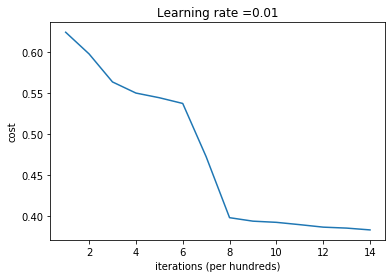

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [11]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

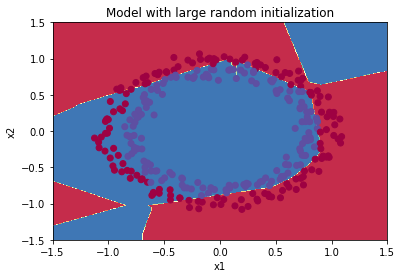

In [12]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm. 
- If you train this network longer you will see better results, but initializing with overly large random numbers slows down the optimization.
- Initializing weights to very large random values does not work well. 
- Hopefully intializing with small random values does better. The important question is: how small should be these random values be? Lets find out in the next part! 

## He initialization

Named for the first author of He et al., 2015. (If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])` where He initialization would use `sqrt(2./layers_dims[l-1])`.)

In [13]:
def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * np.sqrt(2./layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [14]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071795
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322565
Cost after iteration 9000: 0.18597287209206842
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273548
Cost after iteration 12000: 0.09917746546525931
Cost after iteration 13000: 0.08457055954024273
Cost after iteration 14000: 0.07357895962677372


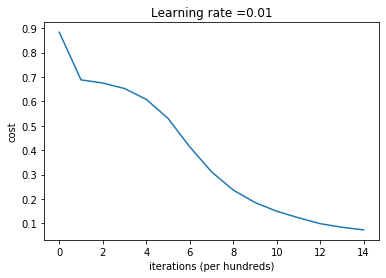

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [15]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

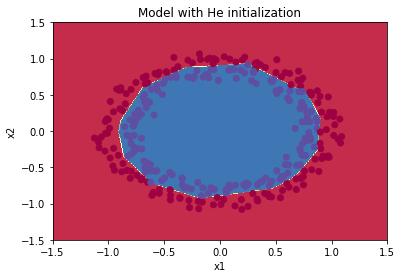

In [16]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

- The model with He initialization separates the blue and the red dots very well in a small number of iterations.

## Conclusion

For the same number of iterations and same hyperparameters the comparison is:

<table> 
    <tr>
        <td>
        Model
        </td>
        <td>
        Train accuracy
        </td>
        <td>
        Problem/Comment
        </td>
    </tr>
        <td>
        3-layer NN with zeros initialization
        </td>
        <td>
        50%
        </td>
        <td>
        fails to break symmetry
        </td>
    <tr>
        <td>
        3-layer NN with large random initialization
        </td>
        <td>
        83%
        </td>
        <td>
        too large weights 
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with He initialization
        </td>
        <td>
        99%
        </td>
        <td>
        recommended method
        </td>
    </tr>
</table> 

- Different initializations lead to different results
- Random initialization is used to break symmetry and make sure different hidden units can learn different things
- Don't intialize to values that are too large
- He initialization works well for networks with ReLU activations. 